In [1]:
import sys

print(sys.path)
sys.path.append("/home/momentino/GarbageDetectionAndSegmentation")

['/home/momentino/GarbageDetectionAndSegmentation/notebooks', '/usr/lib64/python310.zip', '/usr/lib64/python3.10', '/usr/lib64/python3.10/lib-dynload', '', '/home/momentino/.local/lib/python3.10/site-packages', '/usr/lib64/python3.10/site-packages', '/usr/lib/python3.10/site-packages']


In [2]:
!pip install imutils

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import imageio.v3 as iio
import joblib

import random as rand
import numpy as np 
import cv2
import glob
import time

import matplotlib.pyplot as plt
%matplotlib inline

from utils import convert, show_images, put_boxes
from featuresourcer import FeatureSourcer
from binaryclassifier import BinaryClassifier
from slider import Slider

In [4]:
svc = joblib.load('svc.pkl')
scaler = joblib.load('scaler.pkl')

sourcer_params = {
  'color_model': 'hls',                # hls, hsv, yuv, ycrcb
  'bounding_box_w': 64,             #
  'bounding_box_h' : 48,
  'number_of_orientations': 12,        # 6 - 12
  'pixels_per_cell': 8,               # 8, 16
  'cells_per_block': 2,                # 1, 2
  'do_transform_sqrt': True
}

cls = BinaryClassifier(svc, scaler)


In [5]:
def bounding_boxes_test(this_image):
    
  boxed_images = []
  #strips = []
  bounding_boxes = slider.locate(image = this_image)
  print("BOUNDING BOXES ",bounding_boxes)
  img = put_boxes(this_image, bounding_boxes) 
  boxed_images.append(img)
  #strips.append(slider.strip())

  #show_images(strips, per_row = len(strips), per_col = 1, W = 15, H = 3)
  show_images([img], per_row = len(boxed_images), per_col = 1, W = 15, H = 3)

iteration  0
image dim (3264, 2448, 3)
STEP SIZE  32
iteration  1
image dim (2176, 1632, 3)
STEP SIZE  21
iteration  2
image dim (1450, 1088, 3)
STEP SIZE  14
iteration  3
image dim (966, 725, 3)
STEP SIZE  9
iteration  4
image dim (643, 483, 3)
STEP SIZE  6
iteration  5
image dim (428, 322, 3)
STEP SIZE  4
iteration  6
image dim (284, 214, 3)
STEP SIZE  2
iteration  7
image dim (188, 142, 3)
STEP SIZE  1
iteration  8
image dim (124, 94, 3)
STEP SIZE  1
iteration  9
image dim (81, 62, 3)
STEP SIZE  1
iteration  10
image dim (53, 41, 3)
STEP SIZE  1
BOUNDING BOXES  [(546, 546, (1093, 820)), (563, 546, (1093, 820)), (580, 546, (1093, 820)), (598, 546, (1093, 820)), (615, 546, (1093, 820)), (632, 546, (1093, 820)), (649, 546, (1093, 820)), (666, 546, (1093, 820)), (546, 563, (1093, 820)), (563, 563, (1093, 820)), (580, 563, (1093, 820)), (598, 563, (1093, 820)), (615, 563, (1093, 820)), (632, 563, (1093, 820)), (649, 563, (1093, 820)), (666, 563, (1093, 820)), (546, 580, (1093, 820)), (56

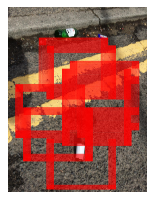

In [6]:
#ratio = 0.75
#w_h = 48,128,196,512,2048
#w_w = int(48/ratio),int(128/ratio),int(196/ratio),int(512/ratio),int(2048/ratio)
#starting_y = 0, 0, 0, 0,0,0,0
#starting_x = 0, 0, 0, 0,0,0,0
#wp = tuple(zip(starting_x, starting_y)) 
#ws = tuple(zip(w_w, w_h)) 

#wp = 0,0,0,0,0,0,0

test1 = iio.imread("/home/momentino/TACO/data/batch_2/000001.JPG")
src = FeatureSourcer(sourcer_params, iio.imread("/home/momentino/TACO/data/batch_2/000001.JPG"))
slider = Slider(sourcer = src, classifier = cls, increment = 32)
bounding_boxes_test(test1)

iteration  0
image dim (2049, 1537, 3)
STEP SIZE  32
iteration  1
image dim (1365, 1024, 3)
STEP SIZE  21
iteration  2
image dim (909, 682, 3)
STEP SIZE  14
iteration  3
image dim (605, 454, 3)
STEP SIZE  9
iteration  4
image dim (402, 302, 3)
STEP SIZE  6
iteration  5
image dim (267, 201, 3)
STEP SIZE  4
iteration  6
image dim (178, 134, 3)
STEP SIZE  2
iteration  7
image dim (118, 89, 3)
STEP SIZE  1
iteration  8
image dim (78, 59, 3)
STEP SIZE  1
iteration  9
image dim (51, 39, 3)
STEP SIZE  1
BOUNDING BOXES  []


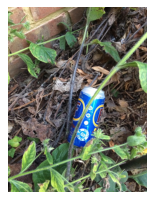

In [7]:
test2 = iio.imread("/home/momentino/TACO/data/batch_1/000029.jpg")
src = FeatureSourcer(sourcer_params, iio.imread("/home/momentino/TACO/data/batch_1/000029.jpg"))
slider = Slider(sourcer = src, classifier = cls, increment = 32)
bounding_boxes_test(test2)

iteration  0
image dim (1537, 2049, 3)
STEP SIZE  32
iteration  1
image dim (1024, 1366, 3)
STEP SIZE  21
iteration  2
image dim (682, 910, 3)
STEP SIZE  14
iteration  3
image dim (454, 606, 3)
STEP SIZE  9
iteration  4
image dim (302, 404, 3)
STEP SIZE  6
iteration  5
image dim (201, 269, 3)
STEP SIZE  4
iteration  6
image dim (133, 179, 3)
STEP SIZE  2
iteration  7
image dim (88, 119, 3)
STEP SIZE  1
iteration  8
image dim (58, 79, 3)
STEP SIZE  1
iteration  9
image dim (38, 52, 3)
STEP SIZE  1
BOUNDING BOXES  [(0, 0, (1093, 820)), (17, 0, (1093, 820)), (34, 0, (1093, 820)), (51, 0, (1093, 820)), (68, 0, (1093, 820)), (85, 0, (1093, 820)), (102, 0, (1093, 820)), (119, 0, (1093, 820)), (136, 0, (1093, 820)), (153, 0, (1093, 820)), (170, 0, (1093, 820)), (187, 0, (1093, 820)), (205, 0, (1093, 820)), (222, 0, (1093, 820)), (239, 0, (1093, 820)), (256, 0, (1093, 820)), (273, 0, (1093, 820)), (290, 0, (1093, 820)), (307, 0, (1093, 820)), (324, 0, (1093, 820)), (341, 0, (1093, 820)), (358,

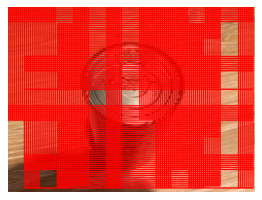

In [8]:
test3 = iio.imread("/home/momentino/TACO/data/batch_1/000043.jpg")
src = FeatureSourcer(sourcer_params, iio.imread("/home/momentino/TACO/data/batch_1/000043.jpg"))
slider = Slider(sourcer = src, classifier = cls, increment = 32)
bounding_boxes_test(test3)